In [ ]:
from rijksdriehoek import rijksdriehoek rd = rijksdriehoek.Rijksdriehoek() 
print(“Original coordinates in WGS’84: {},{}”.format(str(52.3761973), str(4.8936216))) 
rd.from_wgs(52.3761973, 4.8936216) print(“Rijksdriehoek: {},{}”.format(str(rd.rd_x), str(rd.rd_y))) 
lat, lon = rd.to_wgs() print(“WGS’84 coordinates converted from RD: {},{}”.format(str(lat), str(lon)))

In [34]:
import glob
import re
# Read csv file  
all_files = glob.glob("BOMEN*.csv")
print(all_files)

['BOMEN1.csv', 'BOMEN2.csv', 'BOMEN3.csv', 'BOMEN4.csv']


In [2]:
import pandas as pd 

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, delimiter = ';')
    li.append(df)

table = pd.concat(li, axis=0, ignore_index=True)

In [3]:
table.shape[0]

259431

In [4]:
table

,OBJECTNUMMER,Soortnaam_NL,Boomnummer,Soortnaam_WTS,Boomtype,Boomhoogte,Plantjaar,Eigenaar,Beheerder,Categorie,SOORT_KORT,SDVIEW,RADIUS,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Unnamed: 17
0,1,Amerikaanse linde,589672,Tilia americana,Boom niet vrij uitgroeiend,12 tot 18 m.,1948,Gemeente Amsterdam,Stadsdeel Zuid,Tilia,Tilia,K,5,POINT(4.90467 52.339815),POINT(52.339815 4.90467),4.904670,52.339815,NaN
1,2,Huntingdon-iep,589671,Ulmus hollandica `Vegeta`,Boom niet vrij uitgroeiend,6 tot 12 m.,1978,Gemeente Amsterdam,Stadsdeel Zuid,Ulmus,Ulmus,K,3,POINT(4.902692 52.340094),POINT(52.340094 4.902692),4.902692,52.340094,NaN
2,3,Gewone es (cultuurvariëteit),589670,Fraxinus excelsior `Westhof`s Glorie`,Boom niet vrij uitgroeiend,9 tot 12 m.,1990,Gemeente Amsterdam,Stadsdeel Zuid,Fraxinus,Fraxinus,K,3,POINT(4.855208 52.331986),POINT(52.331986 4.855208),4.855208,52.331986,NaN
3,4,Gele bergiep (cultuurvariëteit),589669,Ulmus glabra `Lutescens`,Boom niet vrij uitgroeiend,6 tot 12 m.,2002,Gemeente Amsterdam,Stadsdeel Zuid,Ulmus,Ulmus,K,3,POINT(4.90367 52.348838),POINT(52.348838 4.90367),4.903670,52.348838,NaN
4,5,Zomereik,589668,Quercus robur,Boom niet vrij uitgroeiend,6 tot 9 m.,1985,Gemeente Amsterdam,Stadsdeel Zuid,Quercus,Quercus,K,2,POINT(4.875886 52.341057),POINT(52.341057 4.875886),4.875886,52.341057,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259426,259427,Gewone esdoorn,0,Acer pseudoplatanus,Boom niet vrij uitgroeiend,18 tot 24 m.,0,Gemeente Amsterdam,Stadsdeel Zuidoost,Acer,Acer,T,7,POINT(4.968736 52.298498),POINT(52.298498 4.968736),4.968736,52.298498,NaN
259427,259428,Veldesdoorn,0,Acer campestre,Boom vrij uitgroeiend,9 tot 12 m.,0,Gemeente Amsterdam,Stadsdeel Zuidoost,Acer,Acer,T,3,POINT(4.968974 52.298392),POINT(52.298392 4.968974),4.968974,52.298392,NaN
259428,259429,Gewone esdoorn,0,Acer pseudoplatanus,Boom niet vrij uitgroeiend,18 tot 24 m.,0,Gemeente Amsterdam,Stadsdeel Zuidoost,Acer,Acer,T,7,POINT(4.969281 52.298189),POINT(52.298189 4.969281),4.969281,52.298189,NaN
259429,259430,Gewone haagbeuk,0,Carpinus betulus,Boom niet vrij uitgroeiend,9 tot 12 m.,0,Gemeente Amsterdam,Stadsdeel Zuidoost,Carpinus,Carpinus,T,3,POINT(4.967459 52.300042),POINT(52.300042 4.967459),4.967459,52.300042,NaN


In [5]:
import laspy

# Need to convert LONG, LAT to X, Y, Z to map Tree data on AHN3

In [6]:
%pip install numba
%pip install pyproj

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numba
import numpy as np

@numba.njit
def convert_cart_to_long_lat(x, y, z):

    a = 6378137.0 #in meters
    b = 6356752.314245 #in meters

    f = (a - b) / a

    e_sq = f * (2 - f)                       
    eps = e_sq / (1.0 - e_sq)

    p = np.sqrt(x * x + y * y)
    q = np.atan2((z * a), (p * b))

    sin_q = np.sin(q)
    cos_q = np.cos(q)

    sin_q_3 = sin_q * sin_q * sin_q
    cos_q_3 = cos_q * cos_q * cos_q

    phi = np.atan2((z + eps * b * sin_q_3), (p - e_sq * a * cos_q_3))
    lam = np.atan2(y, x)

    v = a / np.sqrt(1.0 - e_sq * np.sin(phi) * np.sin(phi))
    h   = (p / np.cos(phi)) - v

    lat = np.degrees(phi)
    lon = np.degrees(lam)

    return lat,lon,h

In [8]:
import pyproj

x = 0#points.x[0]
y = 0#points.y[0]

print(x, y)

p = pyproj.Proj("+proj=merc +lon_0=0 +k=1 +x_0=0 +y_0=0 +a=6378137 +b=6378137 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs")
lon, lat = p(x, y, inverse=True)
print(lat, lon)

0 0
0.0 0.0


OBJECTNUMMER                              1
Soortnaam_NL              Amerikaanse linde
Boomnummer                           589672
Soortnaam_WTS               Tilia americana
Boomtype         Boom niet vrij uitgroeiend
Boomhoogte                     12 tot 18 m.
Plantjaar                              1948
Eigenaar                 Gemeente Amsterdam
Beheerder                    Stadsdeel Zuid
Categorie                             Tilia
SOORT_KORT                            Tilia
SDVIEW                                    K
RADIUS                                    5
WKT_LNG_LAT        POINT(4.90467 52.339815)
WKT_LAT_LNG        POINT(52.339815 4.90467)
LNG                                 4.90467
LAT                               52.339815
Unnamed: 17                             NaN
Name: 0, dtype: object


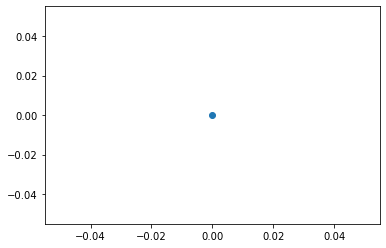

In [9]:
import matplotlib.pyplot as plt
from pyproj import Proj
p = Proj(proj='utm',zone=10,ellps='WGS84', preserve_units=False)

for i in table.iterrows():
    print(i[1])
    plt.scatter(x, y)
    break

plt.show()
    

In [10]:
# https://github.com/djvanderlaan/rijksdriehoek/blob/master/Python/rijksdriehoek.py

X0      = 155000
Y0      = 463000
PHI0    = 52.15517440
LAM0    = 5.38720621

@numba.njit
def rd_to_wgs(x, y):
    """
    Convert rijksdriehoekcoordinates into WGS84 cooridnates. Input parameters: x (float), y (float). 
    """

    if isinstance(x, (list, tuple)):
        x, y = x

    pqk = [(0, 1, 3235.65389),
        (2, 0, -32.58297),
        (0, 2, -0.24750),
        (2, 1, -0.84978),
        (0, 3, -0.06550),
        (2, 2, -0.01709),
        (1, 0, -0.00738),
        (4, 0, 0.00530),
        (2, 3, -0.00039),
        (4, 1, 0.00033),
        (1, 1, -0.00012)]

    pql = [(1, 0, 5260.52916), 
        (1, 1, 105.94684), 
        (1, 2, 2.45656), 
        (3, 0, -0.81885), 
        (1, 3, 0.05594), 
        (3, 1, -0.05607), 
        (0, 1, 0.01199), 
        (3, 2, -0.00256), 
        (1, 4, 0.00128), 
        (0, 2, 0.00022), 
        (2, 0, -0.00022), 
        (5, 0, 0.00026)]

    dx = 1E-5 * ( x - X0 )
    dy = 1E-5 * ( y - Y0 )
    
    phi = PHI0
    lam = LAM0

    for p, q, k in pqk:
        phi += k * dx**p * dy**q / 3600

    for p, q, l in pql:
        lam += l * dx**p * dy**q / 3600

    return phi,lam

@numba.njit
def wgs_to_rd(phi, lam):
    """
    Convert WGS84 cooridnates into rijksdriehoekcoordinates. Input parameters: phi (float), lambda (float). 
    """

    pqr = [(0, 1, 190094.945),
           (1, 1, -11832.228),
           (2, 1, -114.221),
           (0, 3, -32.391),
           (1, 0, -0.705),
           (3, 1, -2.34),
           (1, 3, -0.608),
           (0, 2, -0.008),
           (2, 3, 0.148)]
    
    pqs = [(1, 0, 309056.544),
           (0, 2, 3638.893),
           (2, 0, 73.077),
           (1, 2, -157.984),
           (3, 0, 59.788),
           (0, 1, 0.433),
           (2, 2, -6.439),
           (1, 1, -0.032),
           (0, 4, 0.092),
           (1, 4, -0.054)]

    dphi = 0.36 * ( phi - PHI0 )
    dlam = 0.36 * ( lam - LAM0 )

    X = X0
    Y = Y0

    for p, q, r in pqr:
        X += r * dphi**p * dlam**q 

    for p, q, s in pqs:
        Y += s * dphi**p * dlam**q

    return X,Y

# After mapping Amsterdam MAP on AHN3:

1. Cut up the relevant chunk, only want to use where we classified

1.2 Easiest would be to use a square

2. Rewrite LAZ file and use classification keyword to classify either as 1 = tree, 0 = non-tree

Note: trees file contains heights, so use this to classify the points in that pointcloud

Note: Adress difference between Amsterdam and rest of Netherlands (might make a difference)

3. Feed these new laz files into PointCNN to train it.

In [11]:
N_trees = table.shape[0]

In [12]:
N_trees

259431

In [64]:
def tree_df_to_xyz(table):
    X_Y_R_array = np.zeros((N_trees, 5), dtype = np.float32)
    i = 0
    for index, tree in table.iterrows():
        PHI = tree['LAT']
        LAM = tree['LNG']
        X_Y_R_array[index, 0:2] = wgs_to_rd(PHI, LAM)
        X_Y_R_array[index, 2] = tree['RADIUS']

        height_string = tree['Boomhoogte']

        nums = re.findall(r'\d+', height_string)
        # Supposed to find 2 numbers
        if len(nums) == 2:
            X_Y_R_array[index, 3] = nums[0]
            X_Y_R_array[index, 4] = nums[1]
        elif len(nums) == 1:
            X_Y_R_array[index, 3] = 0
            X_Y_R_array[index, 4] = nums[0]
        else:
            #print(height_string)
            i+= 1
            
    print(f"lost {i} trees due to unknown height")
    print(f"lost {i/table.shape[0]*100:.2f} % trees due to unknown height")
    return X_Y_R_array

In [65]:
X_Y_R_array = tree_df_to_xyz(table)

lost 3930 trees due to unknown height
lost 1.51 % trees due to unknown height


In [15]:
int(X_Y_R_array[0, 0])

122114

In [16]:
@numba.njit
def check_if_tree(X, Y):
    # TODO Check if R is given in meters
    for i, tree in enumerate(X_Y_R_array):
        X_T, Y_T, R_T = X_Y_R_array[i]
        # Pythagorean distance
        if np.power(X_T - X, 2) + np.power(Y_T - Y, 2) < R_T**2:
            return True
    return False


In [17]:
check_if_tree(1, 2)

False

In [18]:
tree = table.iloc[0, :]
X_tree, Y_tree = wgs_to_rd(tree['LAT'], tree['LNG'])
check_if_tree(X_tree, Y_tree)

True

## Simple test seems to work, need to visualize to see what points are actually taken

### Could reduce compute by ordering the X_Y_R array and create a trigger so it only loops over part of array

In [19]:
%%time

check_if_tree(X_tree, Y_tree)

CPU times: user 14 µs, sys: 1 µs, total: 15 µs
Wall time: 21.7 µs


True

In [24]:
#@numba.njit
def boundary_search(item_list,item):
	first = 0
	last = N_trees
	while(first<last):
		mid = (first + last)//2
		if item < item_list[mid]:
			last = mid - 1
		else:
			first = mid + 1	
	return first

In [32]:
# Sort the array ascending on the x-coord
X_index = 0
Y_index = 1

X_Y_R_array = X_Y_R_array[np.argsort(X_Y_R_array[:, X_index])]

print(np.max(X_Y_R_array[:, 0]))
print(np.min(X_Y_R_array[:, 0]))

print(np.max(X_Y_R_array[:, 1]))
print(np.min(X_Y_R_array[:, 1]))

#@numba.njit
def check_if_tree_advanced(X, Y):
    # TODO Check if R is given in meters
    begin = X - 10
    end = X + 10

    start_index = boundary_search(X_Y_R_array[:, 0], begin)
    end_index = boundary_search(X_Y_R_array[:, 0], end)
    print(start_index, end_index)
    for i, tree in enumerate(X_Y_R_array[start_index:end_index]):
        X_T, Y_T, R_T = X_Y_R_array[i]
        # Pythagorean distance
        if np.power(X_T - X, 2) + np.power(Y_T - Y, 2) < R_T**2:
            return True
    return False


132249.48
112199.9
493123.66
476938.25


In [26]:
import laspy
import numpy as np

In [33]:
fname = "out.laz"

vectorized_tree_check = np.vectorize(check_if_tree_advanced)
N_points = 100_000
trees = np.zeros((N_points), dtype=np.bool)
i = 0
with laspy.open(fname) as file:
    for points in file.chunk_iterator(N_points):
        #trees = vectorized_tree_check(points.x, points.y)
        #print(np.max(points.x))
        #print(np.min(points.x))
        print(np.max(points.y))
        print(np.min(points.y))
        print('iter done')
        #plt.scatter(points.x.copy()[trees], points.y.copy()[trees])
        print('plot done')
        i+=1
        if i > 10:
            break
plt.show()

470000.0
469030.26
iter done
plot done
469911.16000000003
469158.10000000003
iter done
plot done
469999.97000000003
469156.4
iter done
plot done
470066.19
469283.12
iter done
plot done
471021.60000000003
470000.0
iter done
plot done
471250.0
470000.0
iter done
plot done
471234.60000000003
470368.4
iter done
plot done
470551.62
470120.02
iter done
plot done
470819.38
470000.01
iter done
plot done
470619.57
470178.97000000003
iter done
plot done
470676.5
470368.27
iter done
plot done
